In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [3]:
#data = az.from_netcdf("ar_chi_cost_TransformedUniform.cdf")
data = az.from_netcdf("/Volumes/LaCie/cca/autoregressive-bbh-inference-data/final-ar_chi_cost.cdf")
az.summary(data,["logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "ar_chi_std",
                 "ar_chi_tau",
                 "ar_cost_std",
                 "ar_cost_tau",
                 "nEff_inj_per_event",
                 "min_log_neff"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
logR20,-1.619,1.007,-3.514,0.257,0.022,0.018,2257.0,2460.0,1.0
alpha,-3.842,0.309,-4.379,-3.193,0.007,0.005,2116.0,1756.0,1.0
mMin,9.019,0.919,7.145,10.729,0.018,0.013,2651.0,2288.0,1.0
log_dmMin,-0.401,0.373,-1.000,0.204,0.007,0.005,2612.0,1759.0,1.0
mu_m1,33.178,2.491,28.904,37.282,0.093,0.066,1513.0,649.0,1.0
sig_m1,5.022,2.101,3.000,9.245,0.069,0.052,1590.0,874.0,1.0
log_f_peak,-2.693,0.228,-3.000,-2.278,0.005,0.003,2253.0,2261.0,1.0
mMax,78.505,13.385,55.947,99.907,0.225,0.159,3163.0,2217.0,1.0
log_dmMax,1.051,0.286,0.574,1.498,0.004,0.003,5358.0,2528.0,1.0
bq,2.483,1.304,0.408,4.931,0.023,0.020,4380.0,2367.0,1.0


In [4]:
samps = az.extract(data,var_names=["ar_chi_std","ar_chi_tau","ar_cost_std","ar_cost_tau"])

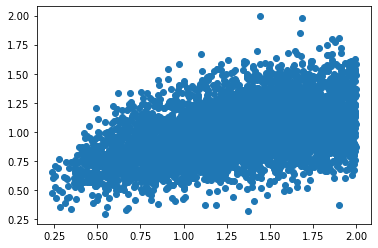

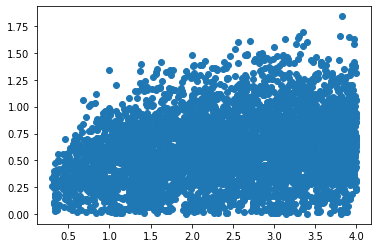

In [5]:
fig,ax = plt.subplots()
ax.scatter(samps.ar_chi_tau,samps.ar_chi_std)
plt.show()

fig,ax = plt.subplots()
ax.scatter(samps.ar_cost_tau,samps.ar_cost_std)
plt.show()

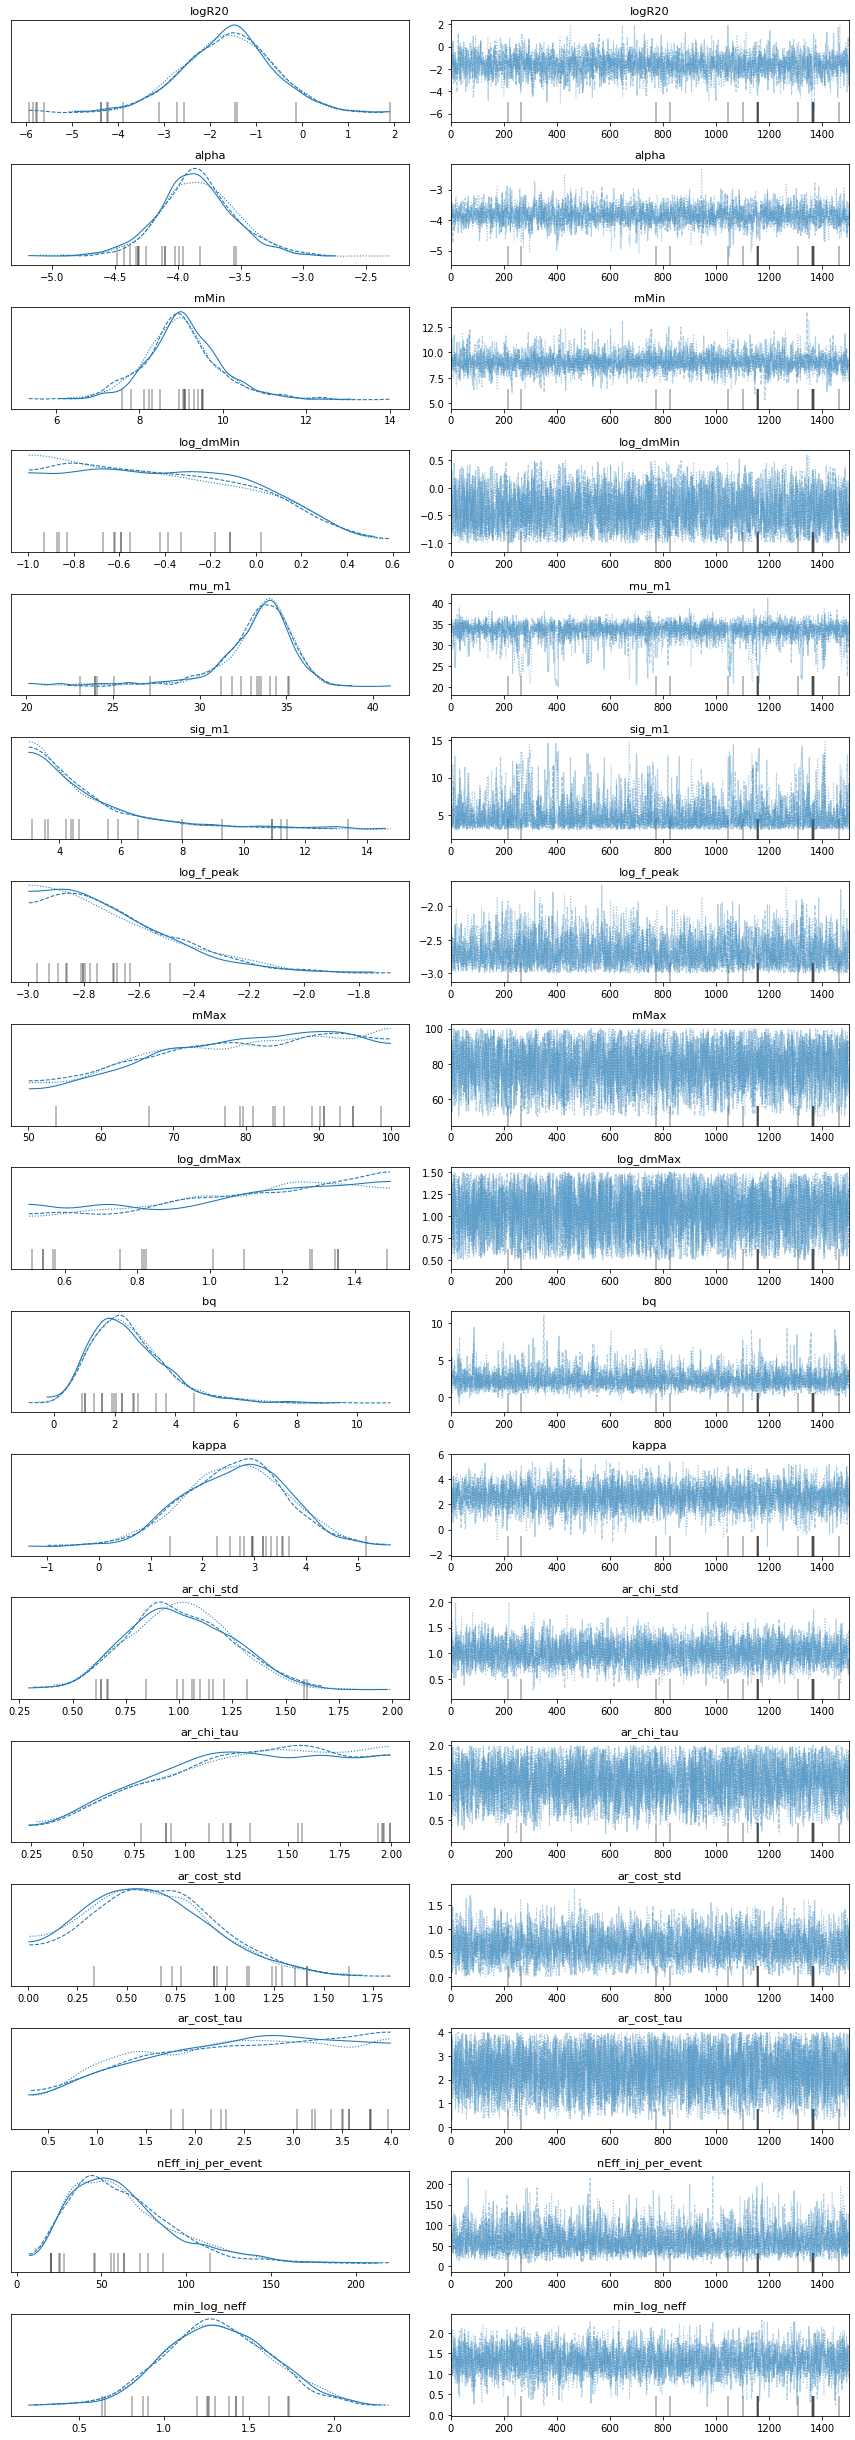

In [3]:
az.plot_trace(data,
              ["logR20",
               "alpha",
               "mMin",
               "log_dmMin",
               "mu_m1",
               "sig_m1",
               "log_f_peak",
               "mMax",
               "log_dmMax",
               "bq",
               "kappa",
               "ar_chi_std",
               "ar_chi_tau",
               "ar_cost_std",
               "ar_cost_tau",
               "nEff_inj_per_event","min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [5]:
#ar_data = np.load('ar_chi_cost_data.npy',allow_pickle=True)[()]
ar_data = np.load('/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/final-ar_chi_cost_data.npy',allow_pickle=True)[()]
chi_values = np.exp(ar_data['chi_allSamples'])
cost_values = ar_data['cost_allSamples']

In [6]:
samps = data.posterior.stack(draws=("chain", "draw"))

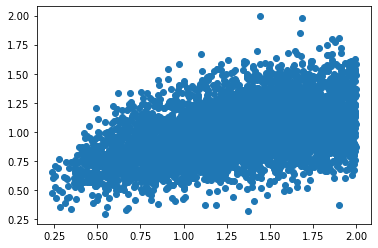

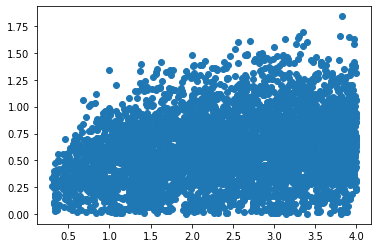

In [7]:
plt.scatter(data.posterior.ar_chi_tau.values,data.posterior.ar_chi_std.values)
plt.show()

plt.scatter(data.posterior.ar_cost_tau.values,data.posterior.ar_cost_std.values)
plt.show()

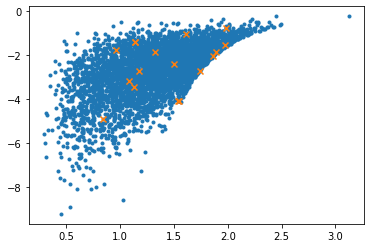

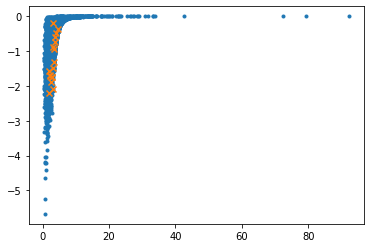

In [8]:
plt.scatter(data.posterior.ar_chi_tau.values/np.sqrt(data.posterior.ar_chi_std.values),
            data.log_likelihood.chi_regularization.values,marker='.')

div_mask=data.sample_stats.diverging.values
plt.scatter((data.posterior.ar_chi_tau.values/np.sqrt(data.posterior.ar_chi_std.values))[div_mask],
            data.log_likelihood.chi_regularization.values[div_mask],marker='x')

plt.show()

plt.scatter(data.posterior.ar_cost_tau.values/np.sqrt(data.posterior.ar_cost_std.values),
            data.log_likelihood.cost_regularization.values,marker='.')

div_mask=data.sample_stats.diverging.values
plt.scatter((data.posterior.ar_cost_tau.values/np.sqrt(data.posterior.ar_cost_std.values))[div_mask],
            data.log_likelihood.cost_regularization.values[div_mask],marker='x')

plt.show()

In [9]:
reduced_f_chis = np.concatenate([data.posterior.f_chis[i][:,::50].values for i in range(1)])
reduced_f_costs = np.concatenate([data.posterior.f_cost[i][:,::50].values for i in range(1)])

In [10]:
reduced_f_chis.shape

(1500, 7111)

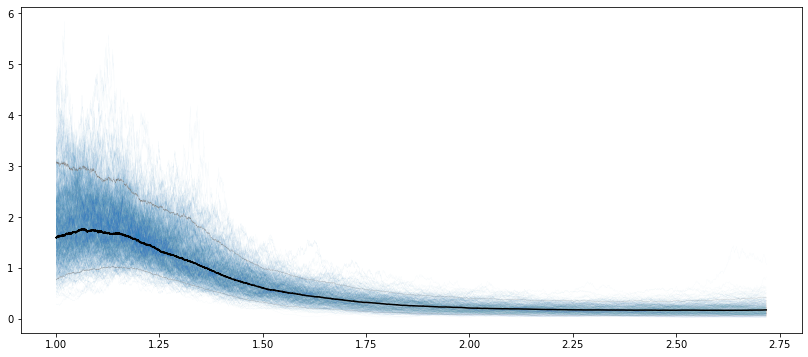

In [11]:
reduced_chis = chi_values[::50]

p_chis = np.zeros((reduced_chis.size,reduced_f_chis.shape[0]))
for i in range(reduced_f_chis.shape[0]):
    p_chis[:,i] = reduced_f_chis[i,:]
    p_chis[:,i] /= np.trapz(p_chis[:,i],reduced_chis)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_chis.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_chis,p_chis[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_chis,np.median(p_chis,axis=1),color='black')
ax.plot(reduced_chis,np.quantile(p_chis,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_chis,np.quantile(p_chis,0.95,axis=1),color='grey',lw=0.15)

plt.show()

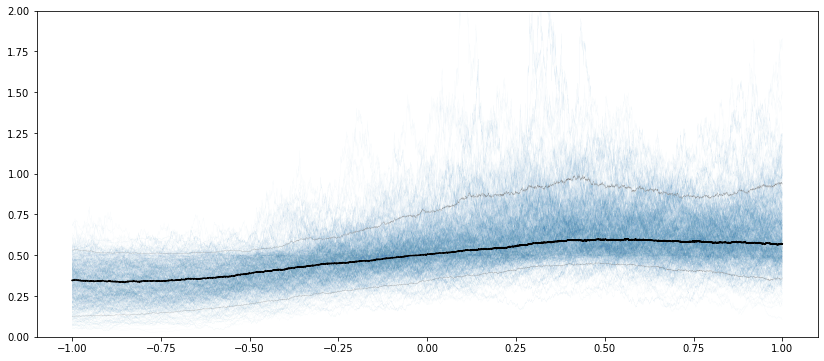

In [12]:
reduced_costs = cost_values[::50]

p_costs = np.zeros((reduced_costs.size,reduced_f_costs.shape[0]))
for i in range(reduced_f_costs.shape[0]):
    p_costs[:,i] = reduced_f_costs[i,:]
    p_costs[:,i] /= np.trapz(p_costs[:,i],reduced_costs)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_costs.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_costs,p_costs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_costs,np.median(p_costs,axis=1),color='black')
ax.plot(reduced_costs,np.quantile(p_costs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_costs,np.quantile(p_costs,0.95,axis=1),color='grey',lw=0.15)

ax.set_ylim(0,2)

plt.show()